# Introduction to Artificial Neural Networks with Keras

In [1]:
import numpy as np
import pandas as pd
import sklearn
import tensorflow as tf
import os
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

## The Perceptron

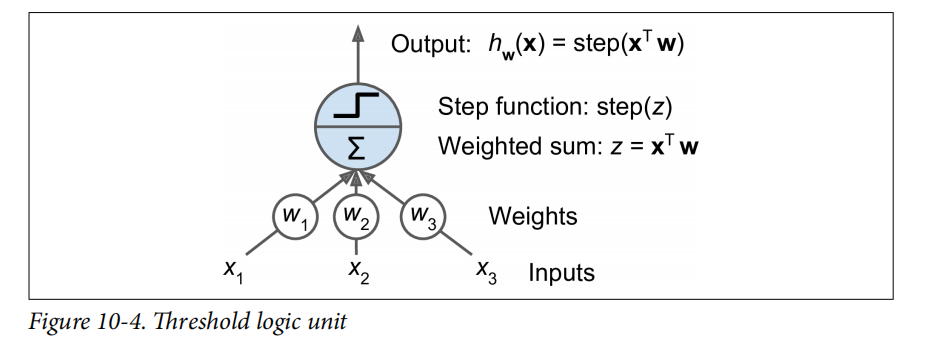

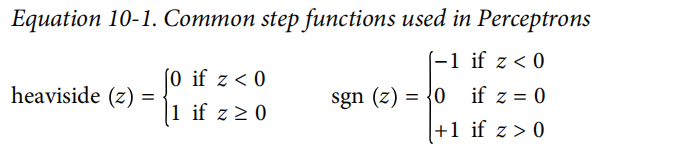

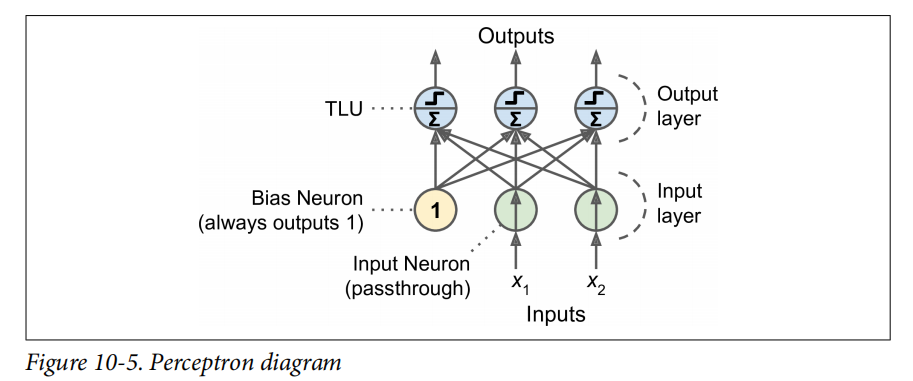

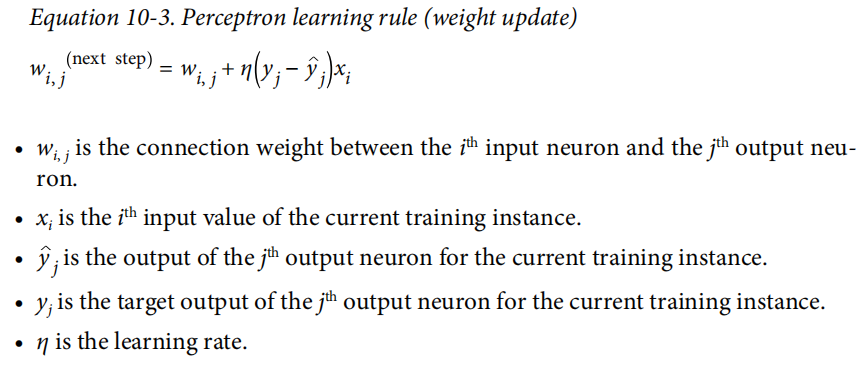

In [3]:
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2,3)] # petal length, petal width
y = (iris.target == 0).astype(np.int) # Iris Setosa?

In [4]:
per_clf = Perceptron()
per_clf.fit(X, y)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [5]:
y_pred = per_clf.predict([[2, 0.5]])

### Multi-Layer Perceptron and Backpropagation

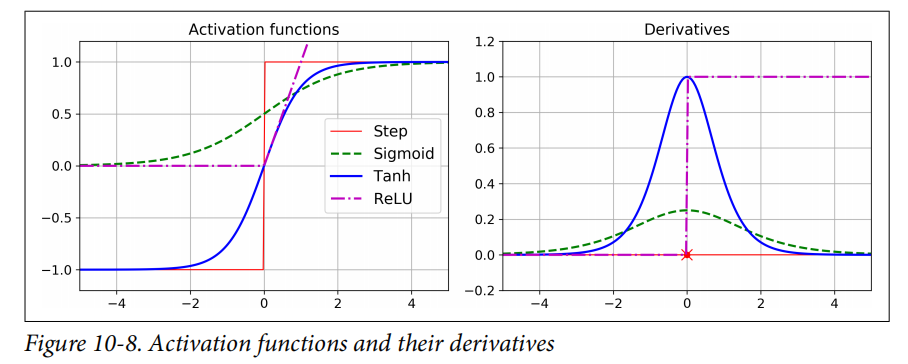

### Regression MLPs

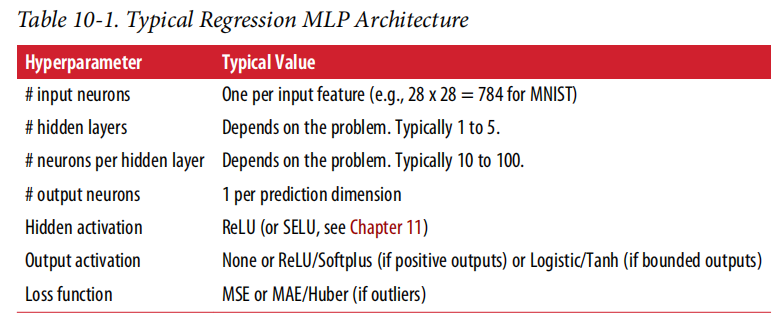

### Classification MLPs

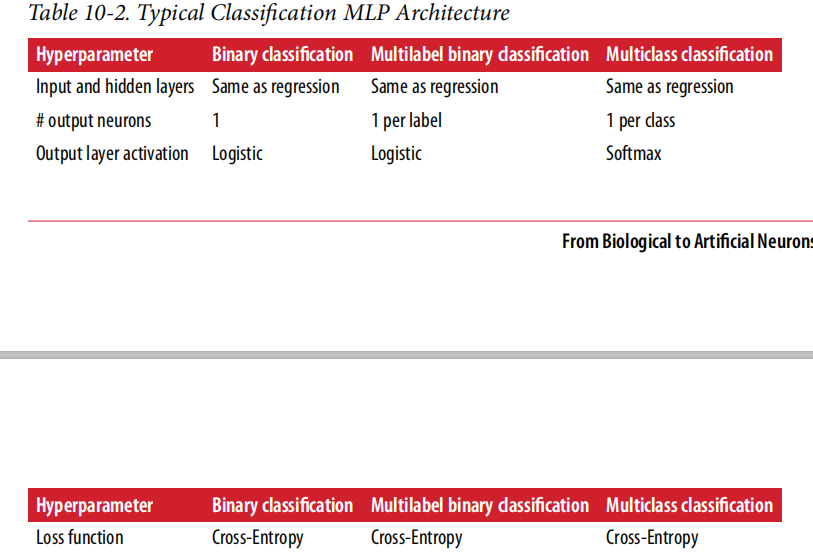

## Implementing MLPs with Keras

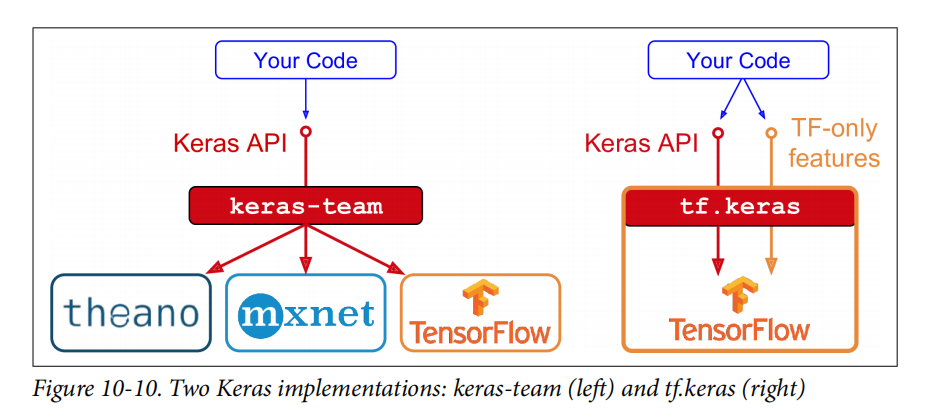

In [6]:
import tensorflow
from tensorflow import keras

tf.__version__

'2.0.0'

In [7]:
keras.__version__

'2.2.4-tf'

### Building an Image Classier Using the Sequential API

In [8]:
fashion_mnist = keras.datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [9]:
X_train.shape

(60000, 28, 28)

In [10]:
X_train.dtype

dtype('uint8')

In [11]:
X_valid, X_train = X_train[:5000] / 255.0, X_train[5000:] / 255.0
y_valid, y_train = y_train[:5000], y_train[5000:]

In [12]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [13]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [14]:
class_names[y_train[1]]

'T-shirt/top'

### Creating the Model Using the Sequential API

In [15]:
model = keras.models.Sequential()

model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [16]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

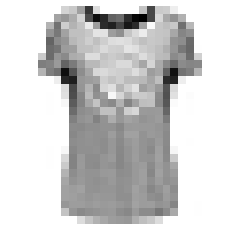

In [17]:
plt.imshow(X_train[1], cmap="binary")
plt.axis('off')
plt.show()

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.layers

In [20]:
model.layers[0].name

'flatten_1'

### Compiling the Model

In [21]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

### Training and Evaluating the Model

In [22]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/20
55000/55000 [==============================] - 14s 252us/sample - loss: 0.7010 - accuracy: 0.7709 - val_loss: 0.5069 - val_accuracy: 0.8324
Epoch 2/20
55000/55000 [==============================] - 5s 96us/sample - loss: 0.4874 - accuracy: 0.8300 - val_loss: 0.4632 - val_accuracy: 0.8428
Epoch 3/20
55000/55000 [==============================] - 5s 94us/sample - loss: 0.4442 - accuracy: 0.8437 - val_loss: 0.4586 - val_accuracy: 0.8344
Epoch 4/20
55000/55000 [==============================] - 5s 98us/sample - loss: 0.4161 - accuracy: 0.8535 - val_loss: 0.4159 - val_accuracy: 0.8604
Epoch 5/20
55000/55000 [==============================] - 5s 98us/sample - loss: 0.3968 - accuracy: 0.8611 - val_loss: 0.3940 - val_accuracy: 0.8660
Epoch 6/20
55000/55000 [==============================] - 5s 94us/sample - loss: 0.3812 - accuracy: 0.8641 - val_loss: 0.3852 - val_accuracy: 0.8688
Epoch 7/20
55000/55000 [==============================]

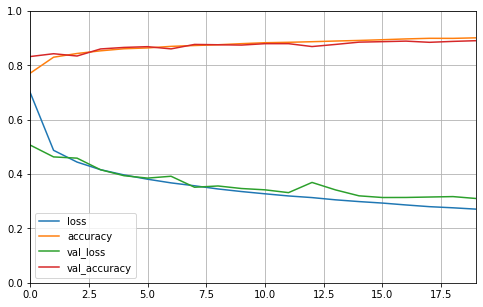

In [23]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [24]:
model.evaluate(X_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[64.83844446620941, 0.8346]

### Using the Model to Make Predictions

In [25]:
X_new = X_test[:3]
y_proba = model.predict_proba(X_new)
y_proba

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [26]:
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [27]:
y_pred = model.predict_classes(X_new)

In [28]:
y_pred

array([9, 2, 1], dtype=int64)

In [29]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

### Building a Regression MLP Using the Sequential API

In [30]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

D:\Python_Tools\Anaconda\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [31]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.fit_transform(X_valid)
X_test_scaled = scaler.fit_transform(X_test)

In [32]:
X_train.shape

(11610, 8)

In [33]:
X_train.shape[1:]

(8,)

In [34]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

In [35]:
model.compile(loss='mean_squared_error', optimizer='sgd')
history = model.fit(X_train_scaled, y_train, epochs=20, validation_data=(X_valid_scaled, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 2s 206us/sample - loss: 0.7697 - val_loss: 1.4881
Epoch 2/20
11610/11610 [==============================] - 1s 104us/sample - loss: 1.4196 - val_loss: 14.4232
Epoch 3/20
11610/11610 [==============================] - 1s 100us/sample - loss: nan - val_loss: nan
Epoch 4/20
11610/11610 [==============================] - 1s 101us/sample - loss: nan - val_loss: nan
Epoch 5/20
11610/11610 [==============================] - 1s 96us/sample - loss: nan - val_loss: nan
Epoch 6/20
11610/11610 [==============================] - 1s 98us/sample - loss: nan - val_loss: nan
Epoch 7/20
11610/11610 [==============================] - 1s 98us/sample - loss: nan - val_loss: nan
Epoch 8/20
11610/11610 [==============================] - 1s 96us/sample - loss: nan - val_loss: nan
Epoch 9/20
11610/11610 [==============================] - 1s 96us/sample - loss: nan - val_loss: nan
Epoch 10/20
11610/11610 [

In [36]:
mse = model.evaluate(X_test_scaled, y_test)

5160/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

 - 0s 26us/sample - loss: nan


In [37]:
X_new = X_test_scaled[:3]
y_pred = model.predict(X_new)
y_pred

array([[nan],
       [nan],
       [nan]], dtype=float32)

In [38]:
y_test[:3]

array([1.825, 1.107, 1.031])

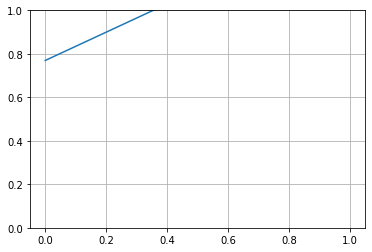

In [39]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

### Building Complex Models Using the Functional API

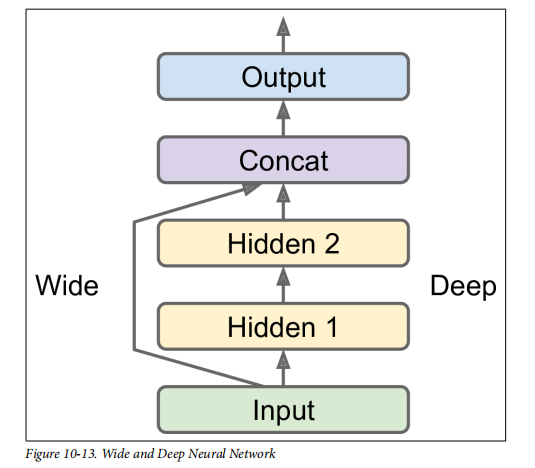

In [40]:
np.random.seed(42)
tf.random.set_seed(42)

In [41]:
input = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(10, activation='relu')(input)
hidden2 = keras.layers.Dense(10, activation='relu')(hidden1)
concat =keras.layers.concatenate([input, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input], outputs=[output])

In [42]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_8 (Dense)                 (None, 10)           90          input_1[0][0]                    
__________________________________________________________________________________________________
dense_9 (Dense)                 (None, 10)           110         dense_8[0][0]                    
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 18)           0           input_1[0][0]                    
                                                                 dense_9[0][0]                

In [43]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train_scaled, y_train, epochs=20, validation_data=(X_valid_scaled, y_valid))
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 3s 261us/sample - loss: 1.6194 - val_loss: 0.9302
Epoch 2/20
11610/11610 [==============================] - 2s 135us/sample - loss: 0.8594 - val_loss: 0.7024
Epoch 3/20
11610/11610 [==============================] - 2s 138us/sample - loss: 0.6904 - val_loss: 0.6449
Epoch 4/20
11610/11610 [==============================] - 2s 140us/sample - loss: 0.6455 - val_loss: 0.6178
Epoch 5/20
11610/11610 [==============================] - 1s 114us/sample - loss: 0.6130 - val_loss: 0.5986
Epoch 6/20
11610/11610 [==============================] - 1s 110us/sample - loss: 0.5991 - val_loss: 0.5823
Epoch 7/20
11610/11610 [==============================] - 1s 106us/sample - loss: 0.5848 - val_loss: 0.5711
Epoch 8/20
11610/11610 [==============================] - 1s 97us/sample - loss: 0.5752 - val_loss: 0.5629
Epoch 9/20
11610/11610 [==============================] - 1s 102us/sample - loss: 0.5663

In [44]:
# Multiple Inputs
input_A = keras.layers.Input(shape=[5])
input_B = keras.layers.Input(shape=[6])
hidden1 = keras.layers.Dense(5, activation='relu')(input_B)
hidden2 = keras.layers.Dense(5, activation='relu')(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [45]:
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [46]:
# model.compile(loss='mse', optimizer=keras.optimizers.SGD(lr=1e-3))

# X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
# X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
# X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
# X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

# history = model.fit((X_train_A, X_train_B), y_train, epochs=20, validation_data=((X_valid_A, X_valid_B), y_valid))

In [47]:
output = keras.layers.Dense(1)(concat)
aux_output = keras.layers.Dense(1)(hidden2)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

In [48]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer="sgd")

In [49]:
# history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20, validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

### Building Dynamic Models Using the Subclassing API

In [50]:
class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=10, activation="relu", **kwargs):
         super().__init__(**kwargs) # handles standard args (e.g., name)
         self.hidden1 = keras.layers.Dense(units, activation=activation)
         self.hidden2 = keras.layers.Dense(units, activation=activation)
         self.main_output = keras.layers.Dense(1)
         self.aux_output = keras.layers.Dense(1)
    def call(self, inputs):
         input_A, input_B = inputs
         hidden1 = self.hidden1(input_B)
         hidden2 = self.hidden2(hidden1)
         concat = keras.layers.concatenate([input_A, hidden2])
         main_output = self.main_output(concat)
         aux_output = self.aux_output(hidden2)
         return main_output, aux_output

model = WideAndDeepModel()

## Saving and Restoring a Model

In [51]:
input = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(10, activation='relu')(input)
hidden2 = keras.layers.Dense(10, activation='relu')(hidden1)
concat =keras.layers.concatenate([input, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input], outputs=[output])

In [52]:
model.save("keras_model.h5")

In [53]:
model = keras.models.load_model("keras_model.h5")

## Using Callbacks

In [54]:
checkpoint = keras.callbacks.ModelCheckpoint("keras_checkpoint.h5")

model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train_scaled, y_train, epochs=10, callbacks=[checkpoint])

Train on 11610 samples
Epoch 1/10
11610/11610 [==============================] - 1s 91us/sample - loss: 2.2176
Epoch 2/10
11610/11610 [==============================] - 1s 56us/sample - loss: 0.8243
Epoch 3/10
11610/11610 [==============================] - 1s 52us/sample - loss: 0.7367
Epoch 4/10
11610/11610 [==============================] - 1s 51us/sample - loss: 0.6965
Epoch 5/10
11610/11610 [==============================] - 1s 49us/sample - loss: 0.6663
Epoch 6/10
11610/11610 [==============================] - 1s 51us/sample - loss: 0.6409
Epoch 7/10
11610/11610 [==============================] - 1s 51us/sample - loss: 0.6203
Epoch 8/10
11610/11610 [==============================] - 1s 51us/sample - loss: 0.6025
Epoch 9/10
11610/11610 [==============================] - 1s 50us/sample - loss: 0.5873
Epoch 10/10
11610/11610 [==============================] - 1s 50us/sample - loss: 0.5749


In [55]:
checkpoint = keras.callbacks.ModelCheckpoint("keras_checkpoint.h5", save_best_only=True)

history = model.fit(X_train_scaled, y_train, epochs=20, validation_data=(X_valid_scaled, y_valid), callbacks=[checkpoint])

model = keras.models.load_model("keras_checkpoint.h5")

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 71us/sample - loss: 0.5642 - val_loss: 0.5587
Epoch 2/20
11610/11610 [==============================] - 1s 72us/sample - loss: 0.5551 - val_loss: 0.5503
Epoch 3/20
11610/11610 [==============================] - 1s 66us/sample - loss: 0.5472 - val_loss: 0.5456
Epoch 4/20
11610/11610 [==============================] - 1s 67us/sample - loss: 0.5405 - val_loss: 0.5395
Epoch 5/20
11610/11610 [==============================] - 1s 67us/sample - loss: 0.5347 - val_loss: 0.5352
Epoch 6/20
11610/11610 [==============================] - 1s 66us/sample - loss: 0.5301 - val_loss: 0.5295
Epoch 7/20
11610/11610 [==============================] - 1s 65us/sample - loss: 0.5257 - val_loss: 0.5265
Epoch 8/20
11610/11610 [==============================] - 1s 65us/sample - loss: 0.5219 - val_loss: 0.5231
Epoch 9/20
11610/11610 [==============================] - 1s 68us/sample - loss: 0.5183 - val_l

### Early Stopping

In [56]:
early_stopping = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
history = model.fit(X_train_scaled, y_train, epochs=100, validation_data=(X_valid_scaled, y_valid), callbacks=[early_stopping])

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 1s 113us/sample - loss: 0.4920 - val_loss: 0.5000
Epoch 2/100
11610/11610 [==============================] - 1s 77us/sample - loss: 0.4899 - val_loss: 0.4984
Epoch 3/100
11610/11610 [==============================] - 1s 76us/sample - loss: 0.4887 - val_loss: 0.4995
Epoch 4/100
11610/11610 [==============================] - 1s 78us/sample - loss: 0.4869 - val_loss: 0.4967
Epoch 5/100
11610/11610 [==============================] - 1s 82us/sample - loss: 0.4850 - val_loss: 0.4963
Epoch 6/100
11610/11610 [==============================] - 1s 66us/sample - loss: 0.4843 - val_loss: 0.4921
Epoch 7/100
11610/11610 [==============================] - 1s 70us/sample - loss: 0.4824 - val_loss: 0.4927
Epoch 8/100
11610/11610 [==============================] - 1s 67us/sample - loss: 0.4814 - val_loss: 0.4898
Epoch 9/100
11610/11610 [==============================] - ETA: 0s - loss: 0.476 - 1s 

### Visualization Using TensorBoard

In [57]:
root_logdir = os.path.join(os.curdir, "my_logs")
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
run_logdir

'.\\my_logs\\run_2019_10_25-11_29_17'

In [58]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train_scaled, y_train, epochs=10, validation_data=(X_valid_scaled, y_valid), callbacks=[tensorboard_cb])

Train on 11610 samples, validate on 3870 samples
Epoch 1/10
11610/11610 [==============================] - 3s 275us/sample - loss: 0.4454 - val_loss: 0.4635
Epoch 2/10
11610/11610 [==============================] - 3s 245us/sample - loss: 0.4473 - val_loss: 0.4573
Epoch 3/10
11610/11610 [==============================] - 3s 262us/sample - loss: 0.4443 - val_loss: 0.4663
Epoch 4/10
11610/11610 [==============================] - 3s 252us/sample - loss: 0.4477 - val_loss: 0.4594
Epoch 5/10
11610/11610 [==============================] - 3s 234us/sample - loss: 0.4465 - val_loss: 0.4697
Epoch 6/10
11610/11610 [==============================] - 3s 243us/sample - loss: 0.4516 - val_loss: 0.4617
Epoch 7/10
11610/11610 [==============================] - 2s 202us/sample - loss: 0.4520 - val_loss: 0.4755
Epoch 8/10
11610/11610 [==============================] - 3s 229us/sample - loss: 0.4555 - val_loss: 0.4676
Epoch 9/10
11610/11610 [==============================] - 3s 248us/sample - loss: 0.458

In [59]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

Reusing TensorBoard on port 6006 (pid 7232), started 4 days, 15:24:31 ago. (Use '!kill 7232' to kill it.)

### Fine-Tuning Neural Network Hyperparameters

In [60]:
def build_model(n_hidden=1, n_neurons=10, learning_rate=1e-3, input_shape=[8]):
    model = keras.models.Sequential()
    options = {"input_shape": input_shape}
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation='relu', **options))
        options = {}
    model.add(keras.layers.Dense(1, **options))
    optimizer = keras.optimizers.SGD(learning_rate)
    model.compile(loss='mse', optimizer=optimizer)
    return model

In [61]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [62]:
keras_reg.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid), 
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])
mse = keras_reg.score(X_test, y_test)
y_pred = keras_reg.predict(X_new)

Train on 11610 samples, validate on 3870 samples
Epoch 1/10
11610/11610 [==============================] - 3s 225us/sample - loss: 2.3320 - val_loss: 1.0428
Epoch 2/10
11610/11610 [==============================] - 2s 149us/sample - loss: 0.9082 - val_loss: 0.8265
Epoch 3/10
11610/11610 [==============================] - 1s 84us/sample - loss: 0.7747 - val_loss: 0.7423
Epoch 4/10
11610/11610 [==============================] - 1s 81us/sample - loss: 0.7026 - val_loss: 0.6871
Epoch 5/10
11610/11610 [==============================] - 1s 78us/sample - loss: 0.6537 - val_loss: 0.6482
Epoch 6/10
11610/11610 [==============================] - 1s 79us/sample - loss: 0.6181 - val_loss: 0.6182
Epoch 7/10
11610/11610 [==============================] - 1s 80us/sample - loss: 0.5915 - val_loss: 0.5968
Epoch 8/10
11610/11610 [==============================] - 1s 83us/sample - loss: 0.5714 - val_loss: 0.5808
Epoch 9/10
11610/11610 [==============================] - 1s 81us/sample - loss: 0.5558 - val

In [63]:
y_pred

array([2.7774   , 2.2346401, 1.4924363], dtype=float32)

In [65]:
from sklearn.model_selection import RandomizedSearchCV

params = {
 "n_hidden": [1, 2, 3],
 "n_neurons": np.arange(1, 50, 10),
 "learning_rate": [0.01, 0.03, 0.05],
}

rnd_search_cv = RandomizedSearchCV(keras_reg, params, n_iter=10, cv=3)
rnd_search_cv.fit(X_train, y_train, epochs=5, validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Train on 7740 samples, validate on 3870 samples
Epoch 1/5
7740/7740 [==============================] - 3s 350us/sample - loss: 0.7231 - val_loss: 0.5050
Epoch 2/5
7740/7740 [==============================] - 1s 179us/sample - loss: 0.4807 - val_loss: 0.6575
Epoch 3/5
7740/7740 [==============================] - 1s 145us/sample - loss: 0.4240 - val_loss: 0.4459
Epoch 4/5
7740/7740 [==============================] - 1s 140us/sample - loss: 0.4042 - val_loss: 0.4156
Epoch 5/5
7740/7740 [==============================] - 1s 150us/sample - loss: 0.3861 - val_loss: 0.3762
3870/1 [===================================================================================================================================================================================================================================================================================================================================================================================================================================

Train on 7740 samples, validate on 3870 samples
Epoch 1/5
7740/7740 [==============================] - 2s 229us/sample - loss: 0.6167 - val_loss: 1.3725
Epoch 2/5
7740/7740 [==============================] - 1s 115us/sample - loss: 2.2099 - val_loss: 3.1878
Epoch 3/5
7740/7740 [==============================] - 1s 109us/sample - loss: nan - val_loss: nan
Epoch 4/5
1920/7740 [======>.......................] - ETA: 0s - loss: nan

D:\Python_Tools\Anaconda\lib\site-packages\tensorflow_core\python\keras\callbacks.py:1225: RuntimeWarning: invalid value encountered in less
  if self.monitor_op(current - self.min_delta, self.best):


7740/7740 [==============================] - 1s 102us/sample - loss: nan - val_loss: nan
Epoch 5/5
7740/7740 [==============================] - 1s 84us/sample - loss: nan - val_loss: nan
3870/1 [=====================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Train on 7740 samples, validate on 3870 samples
Epoch 1/5
7740/7740 [==============================] - 1s 148us/sample - loss: 0.7903 - val_loss: 0.7233
Epoch 2/5
7740/7740 [==============================] - 1s 91us/sample - loss: nan - val_loss: nan
Epoch 3/5
7740/7740 [==============================] - 1s 90us/sample - loss: nan - val_loss: nan
Epoch 4/5
7740/7740 [==============================] - 1s 77us/sample - loss: nan - val_loss: nan
Epoch 5/5
7740/7740 [==============================] - 1s 76us/sample - loss: nan - val_loss: nan
3870/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================

Train on 7740 samples, validate on 3870 samples
Epoch 1/5
7740/7740 [==============================] - 1s 156us/sample - loss: 1.4601 - val_loss: 1.3621
Epoch 2/5
7740/7740 [==============================] - 1s 79us/sample - loss: 1.3052 - val_loss: 1.3610
Epoch 3/5
7740/7740 [==============================] - 1s 109us/sample - loss: 1.3054 - val_loss: 1.3644
Epoch 4/5
7740/7740 [==============================] - 1s 106us/sample - loss: 1.3063 - val_loss: 1.3610
Epoch 5/5
7740/7740 [==============================] - 1s 77us/sample - loss: 1.3061 - val_loss: 1.3611
3870/1 [=====================================================================================================================================================================================================================================================================================================================================================================================================================================

Train on 7740 samples, validate on 3870 samples
Epoch 1/5
7740/7740 [==============================] - 1s 173us/sample - loss: 1.5342 - val_loss: 1.5733
Epoch 2/5
7740/7740 [==============================] - 1s 90us/sample - loss: 1.3533 - val_loss: 1.3657
Epoch 3/5
7740/7740 [==============================] - 1s 77us/sample - loss: 1.3452 - val_loss: 1.3666
Epoch 4/5
7740/7740 [==============================] - 1s 82us/sample - loss: 1.3460 - val_loss: 1.3609
Epoch 5/5
7740/7740 [==============================] - 1s 107us/sample - loss: 1.3456 - val_loss: 1.3616
3870/1 [======================================================================================================================================================================================================================================================================================================================================================================================================================================

Train on 7740 samples, validate on 3870 samples
Epoch 1/5
7740/7740 [==============================] - 1s 165us/sample - loss: 1.4682 - val_loss: 1.3612
Epoch 2/5
7740/7740 [==============================] - 1s 68us/sample - loss: 1.3188 - val_loss: 1.3654
Epoch 3/5
7740/7740 [==============================] - 1s 68us/sample - loss: 1.3198 - val_loss: 1.3616
Epoch 4/5
7740/7740 [==============================] - 0s 64us/sample - loss: 1.3207 - val_loss: 1.3615
Epoch 5/5
7740/7740 [==============================] - 1s 65us/sample - loss: 1.3211 - val_loss: 1.3607
3870/1 [=======================================================================================================================================================================================================================================================================================================================================================================================================================================

Train on 7740 samples, validate on 3870 samples
Epoch 1/5
7740/7740 [==============================] - 1s 111us/sample - loss: 0.7954 - val_loss: 0.5170
Epoch 2/5
7740/7740 [==============================] - 0s 60us/sample - loss: 0.4883 - val_loss: 0.5899
Epoch 3/5
7740/7740 [==============================] - 1s 66us/sample - loss: 0.4578 - val_loss: 0.4548
Epoch 4/5
7740/7740 [==============================] - 0s 60us/sample - loss: 0.4411 - val_loss: 0.4391
Epoch 5/5
7740/7740 [==============================] - 0s 61us/sample - loss: 0.4253 - val_loss: 0.4143
3870/1 [=======================================================================================================================================================================================================================================================================================================================================================================================================================================

Train on 7740 samples, validate on 3870 samples
Epoch 1/5
7740/7740 [==============================] - 1s 130us/sample - loss: 0.8421 - val_loss: 0.5185
Epoch 2/5
7740/7740 [==============================] - 0s 62us/sample - loss: 0.5194 - val_loss: 0.4802
Epoch 3/5
7740/7740 [==============================] - 0s 60us/sample - loss: 0.4593 - val_loss: 0.4542
Epoch 4/5
7740/7740 [==============================] - 0s 64us/sample - loss: 0.4435 - val_loss: 0.4605
Epoch 5/5
7740/7740 [==============================] - 0s 64us/sample - loss: 0.4281 - val_loss: 0.4139
3870/1 [=======================================================================================================================================================================================================================================================================================================================================================================================================================================

Train on 7740 samples, validate on 3870 samples
Epoch 1/5
7740/7740 [==============================] - 1s 113us/sample - loss: 0.8537 - val_loss: 0.5680
Epoch 2/5
7740/7740 [==============================] - 0s 62us/sample - loss: 0.4982 - val_loss: 0.6504
Epoch 3/5
7740/7740 [==============================] - 0s 61us/sample - loss: 0.4629 - val_loss: 0.4546
Epoch 4/5
7740/7740 [==============================] - 0s 62us/sample - loss: 0.4376 - val_loss: 0.4770
Epoch 5/5
7740/7740 [==============================] - 0s 61us/sample - loss: 0.4251 - val_loss: 0.4434
3870/1 [=======================================================================================================================================================================================================================================================================================================================================================================================================================================

Train on 7740 samples, validate on 3870 samples
Epoch 1/5
7740/7740 [==============================] - 1s 130us/sample - loss: 0.6615 - val_loss: 0.4728
Epoch 2/5
7740/7740 [==============================] - 1s 90us/sample - loss: 0.4665 - val_loss: 0.5860
Epoch 3/5
7740/7740 [==============================] - 1s 82us/sample - loss: 0.4389 - val_loss: 0.4572
Epoch 4/5
7740/7740 [==============================] - 1s 67us/sample - loss: 0.4199 - val_loss: 0.4132
Epoch 5/5
7740/7740 [==============================] - 0s 64us/sample - loss: 0.4019 - val_loss: 0.3817
3870/1 [=======================================================================================================================================================================================================================================================================================================================================================================================================================================

Train on 7740 samples, validate on 3870 samples
Epoch 1/5
7740/7740 [==============================] - 1s 124us/sample - loss: 0.6865 - val_loss: 1.6197
Epoch 2/5
7740/7740 [==============================] - 1s 66us/sample - loss: nan - val_loss: nan
Epoch 3/5
7740/7740 [==============================] - 0s 61us/sample - loss: nan - val_loss: nan
Epoch 4/5
7740/7740 [==============================] - 0s 61us/sample - loss: nan - val_loss: nan
Epoch 5/5
7740/7740 [==============================] - 0s 61us/sample - loss: nan - val_loss: nan
3870/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================

Train on 7740 samples, validate on 3870 samples
Epoch 1/5
7740/7740 [==============================] - 1s 117us/sample - loss: 0.6424 - val_loss: 0.5125
Epoch 2/5
7740/7740 [==============================] - 1s 70us/sample - loss: 0.5481 - val_loss: 0.6679
Epoch 3/5
7740/7740 [==============================] - 0s 62us/sample - loss: nan - val_loss: nan
Epoch 4/5
7740/7740 [==============================] - 0s 63us/sample - loss: nan - val_loss: nan
Epoch 5/5
7740/7740 [==============================] - 0s 63us/sample - loss: nan - val_loss: nan
3870/1 [=========================================================================================================================================================================================================================================================================================================================================================================================================================================================

Train on 7740 samples, validate on 3870 samples
Epoch 1/5
7740/7740 [==============================] - 1s 111us/sample - loss: 1.4021 - val_loss: 1.3633
Epoch 2/5
7740/7740 [==============================] - 0s 61us/sample - loss: 1.3058 - val_loss: 1.3607
Epoch 3/5
7740/7740 [==============================] - 0s 60us/sample - loss: 1.3062 - val_loss: 1.3679
Epoch 4/5
7740/7740 [==============================] - 1s 66us/sample - loss: 1.3076 - val_loss: 1.3607
Epoch 5/5
7740/7740 [==============================] - 0s 64us/sample - loss: 1.3074 - val_loss: 1.3611
3870/1 [=======================================================================================================================================================================================================================================================================================================================================================================================================================================

Train on 7740 samples, validate on 3870 samples
Epoch 1/5
7740/7740 [==============================] - 1s 130us/sample - loss: 0.6660 - val_loss: 0.4900
Epoch 2/5
7740/7740 [==============================] - 0s 62us/sample - loss: 0.4936 - val_loss: 0.5238
Epoch 3/5
7740/7740 [==============================] - 0s 59us/sample - loss: 0.4884 - val_loss: 0.4832
Epoch 4/5
7740/7740 [==============================] - 0s 60us/sample - loss: 0.4844 - val_loss: 0.4859
Epoch 5/5
7740/7740 [==============================] - 1s 66us/sample - loss: 0.4771 - val_loss: 0.4537
3870/1 [=======================================================================================================================================================================================================================================================================================================================================================================================================================================

Train on 7740 samples, validate on 3870 samples
Epoch 1/5
7740/7740 [==============================] - 1s 107us/sample - loss: 0.6172 - val_loss: 0.5115
Epoch 2/5
7740/7740 [==============================] - 0s 60us/sample - loss: 0.4873 - val_loss: 0.6630
Epoch 3/5
7740/7740 [==============================] - 0s 62us/sample - loss: 0.4731 - val_loss: 0.4657
Epoch 4/5
7740/7740 [==============================] - 0s 59us/sample - loss: 0.4679 - val_loss: 0.4755
Epoch 5/5
7740/7740 [==============================] - 0s 59us/sample - loss: 0.6528 - val_loss: 0.4658
3870/1 [=======================================================================================================================================================================================================================================================================================================================================================================================================================================

Train on 7740 samples, validate on 3870 samples
Epoch 1/5
7740/7740 [==============================] - 1s 118us/sample - loss: 0.6784 - val_loss: 0.4960
Epoch 2/5
7740/7740 [==============================] - 0s 64us/sample - loss: 0.5634 - val_loss: 0.6758
Epoch 3/5
7740/7740 [==============================] - 0s 63us/sample - loss: 0.4719 - val_loss: 0.4686
Epoch 4/5
7740/7740 [==============================] - 0s 60us/sample - loss: 0.4496 - val_loss: 0.4446
Epoch 5/5
7740/7740 [==============================] - 0s 60us/sample - loss: 0.4244 - val_loss: 0.4092
3870/1 [=======================================================================================================================================================================================================================================================================================================================================================================================================================================

Train on 7740 samples, validate on 3870 samples
Epoch 1/5
7740/7740 [==============================] - 1s 138us/sample - loss: 0.6555 - val_loss: 0.4867
Epoch 2/5
7740/7740 [==============================] - 0s 62us/sample - loss: 0.4756 - val_loss: 0.5396
Epoch 3/5
7740/7740 [==============================] - 0s 63us/sample - loss: 0.4453 - val_loss: 0.4279
Epoch 4/5
7740/7740 [==============================] - 0s 60us/sample - loss: 0.4360 - val_loss: 0.4227
Epoch 5/5
7740/7740 [==============================] - 0s 61us/sample - loss: 0.4209 - val_loss: 0.4019
3870/1 [=======================================================================================================================================================================================================================================================================================================================================================================================================================================

Train on 7740 samples, validate on 3870 samples
Epoch 1/5
7740/7740 [==============================] - 1s 114us/sample - loss: nan - val_loss: nan
Epoch 2/5
7740/7740 [==============================] - 0s 62us/sample - loss: nan - val_loss: nan
Epoch 3/5
7740/7740 [==============================] - 0s 61us/sample - loss: nan - val_loss: nan
Epoch 4/5
7740/7740 [==============================] - 0s 62us/sample - loss: nan - val_loss: nan
Epoch 5/5
7740/7740 [==============================] - 1s 65us/sample - loss: nan - val_loss: nan
3870/1 [=====================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Train on 7740 samples, validate on 3870 samples
Epoch 1/5
7740/7740 [==============================] - 1s 102us/sample - loss: 0.8278 - val_loss: 0.6386
Epoch 2/5
7740/7740 [==============================] - 0s 58us/sample - loss: 0.5395 - val_loss: 0.5157
Epoch 3/5
7740/7740 [==============================] - 0s 60us/sample - loss: 0.4864 - val_loss: 0.5883
Epoch 4/5
7740/7740 [==============================] - 0s 56us/sample - loss: 0.4615 - val_loss: 0.5021
Epoch 5/5
7740/7740 [==============================] - 0s 57us/sample - loss: 0.4435 - val_loss: 0.5236
3870/1 [=======================================================================================================================================================================================================================================================================================================================================================================================================================================

Train on 7740 samples, validate on 3870 samples
Epoch 1/5
7740/7740 [==============================] - 1s 105us/sample - loss: 1.4584 - val_loss: 13.0296
Epoch 2/5
7740/7740 [==============================] - 0s 61us/sample - loss: nan - val_loss: nan
Epoch 3/5
7740/7740 [==============================] - 0s 61us/sample - loss: nan - val_loss: nan
Epoch 4/5
7740/7740 [==============================] - 0s 57us/sample - loss: nan - val_loss: nan
Epoch 5/5
7740/7740 [==============================] - 0s 59us/sample - loss: nan - val_loss: nan
3870/1 [==============================================================================================================================================================================================================================================================================================================================================================================================================================================================

Train on 7740 samples, validate on 3870 samples
Epoch 1/5
7740/7740 [==============================] - 1s 101us/sample - loss: 0.9725 - val_loss: 0.9901
Epoch 2/5
7740/7740 [==============================] - 0s 60us/sample - loss: 1.6154 - val_loss: 8.5509
Epoch 3/5
7740/7740 [==============================] - 1s 65us/sample - loss: nan - val_loss: nan
Epoch 4/5
7740/7740 [==============================] - 0s 60us/sample - loss: nan - val_loss: nan
Epoch 5/5
7740/7740 [==============================] - 0s 60us/sample - loss: nan - val_loss: nan
3870/1 [=========================================================================================================================================================================================================================================================================================================================================================================================================================================================

Train on 7740 samples, validate on 3870 samples
Epoch 1/5
7740/7740 [==============================] - 1s 114us/sample - loss: 0.8655 - val_loss: 0.6169
Epoch 2/5
7740/7740 [==============================] - 0s 63us/sample - loss: 0.5474 - val_loss: 0.5515
Epoch 3/5
7740/7740 [==============================] - 0s 61us/sample - loss: 0.4882 - val_loss: 0.4884
Epoch 4/5
7740/7740 [==============================] - 0s 64us/sample - loss: 0.4553 - val_loss: 0.4593
Epoch 5/5
7740/7740 [==============================] - 1s 70us/sample - loss: 0.4375 - val_loss: 0.4386
3870/1 [=======================================================================================================================================================================================================================================================================================================================================================================================================================================

Train on 7740 samples, validate on 3870 samples
Epoch 1/5
7740/7740 [==============================] - 1s 115us/sample - loss: 1.4576 - val_loss: 3.3285
Epoch 2/5
7740/7740 [==============================] - 0s 62us/sample - loss: 1.4958 - val_loss: 0.5616
Epoch 3/5
7740/7740 [==============================] - 0s 61us/sample - loss: 0.4898 - val_loss: 0.4656
Epoch 4/5
7740/7740 [==============================] - 0s 61us/sample - loss: 0.4503 - val_loss: 0.4503
Epoch 5/5
7740/7740 [==============================] - 0s 62us/sample - loss: 0.4325 - val_loss: 0.4224
3870/1 [=======================================================================================================================================================================================================================================================================================================================================================================================================================================

Train on 7740 samples, validate on 3870 samples
Epoch 1/5
7740/7740 [==============================] - 1s 120us/sample - loss: 1.0185 - val_loss: 0.8422
Epoch 2/5
7740/7740 [==============================] - 0s 63us/sample - loss: 0.9247 - val_loss: 1.0536
Epoch 3/5
7740/7740 [==============================] - 0s 61us/sample - loss: nan - val_loss: nan
Epoch 4/5
7740/7740 [==============================] - 0s 61us/sample - loss: nan - val_loss: nan
Epoch 5/5
7740/7740 [==============================] - 0s 60us/sample - loss: nan - val_loss: nan
3870/1 [=========================================================================================================================================================================================================================================================================================================================================================================================================================================================

Train on 7740 samples, validate on 3870 samples
Epoch 1/5
7740/7740 [==============================] - 1s 139us/sample - loss: 0.8747 - val_loss: 0.6081
Epoch 2/5
7740/7740 [==============================] - 1s 67us/sample - loss: 0.5543 - val_loss: 0.5256
Epoch 3/5
7740/7740 [==============================] - 0s 60us/sample - loss: 0.4935 - val_loss: 0.8622
Epoch 4/5
7740/7740 [==============================] - 0s 59us/sample - loss: 0.4654 - val_loss: 0.4611
Epoch 5/5
7740/7740 [==============================] - 0s 60us/sample - loss: 0.4401 - val_loss: 0.4492
3870/1 [=======================================================================================================================================================================================================================================================================================================================================================================================================================================

Train on 7740 samples, validate on 3870 samples
Epoch 1/5
7740/7740 [==============================] - 1s 108us/sample - loss: 1.1089 - val_loss: 0.9762
Epoch 2/5
7740/7740 [==============================] - 0s 61us/sample - loss: 1.2577 - val_loss: 1.0652
Epoch 3/5
7740/7740 [==============================] - 0s 62us/sample - loss: 2.1073 - val_loss: 0.5103
Epoch 4/5
7740/7740 [==============================] - 1s 65us/sample - loss: 0.4859 - val_loss: 0.4610
Epoch 5/5
7740/7740 [==============================] - 0s 61us/sample - loss: 0.4509 - val_loss: 0.4344
3870/1 [=======================================================================================================================================================================================================================================================================================================================================================================================================================================

Train on 7740 samples, validate on 3870 samples
Epoch 1/5
7740/7740 [==============================] - 1s 107us/sample - loss: 0.9264 - val_loss: 0.5943
Epoch 2/5
7740/7740 [==============================] - 0s 60us/sample - loss: 0.6181 - val_loss: 0.6449
Epoch 3/5
7740/7740 [==============================] - 0s 60us/sample - loss: 0.6583 - val_loss: 0.4896
Epoch 4/5
7740/7740 [==============================] - 0s 61us/sample - loss: 0.4618 - val_loss: 0.4998
Epoch 5/5
7740/7740 [==============================] - 0s 61us/sample - loss: 0.4408 - val_loss: 0.4473
3870/1 [=======================================================================================================================================================================================================================================================================================================================================================================================================================================

Train on 7740 samples, validate on 3870 samples
Epoch 1/5
7740/7740 [==============================] - 1s 101us/sample - loss: 0.8956 - val_loss: 0.6337
Epoch 2/5
7740/7740 [==============================] - 0s 60us/sample - loss: 0.5687 - val_loss: 0.5499
Epoch 3/5
7740/7740 [==============================] - 0s 59us/sample - loss: 0.5222 - val_loss: 0.7044
Epoch 4/5
7740/7740 [==============================] - 0s 58us/sample - loss: 0.4937 - val_loss: 0.5003
Epoch 5/5
7740/7740 [==============================] - 0s 59us/sample - loss: 0.4756 - val_loss: 0.4952
3870/1 [=======================================================================================================================================================================================================================================================================================================================================================================================================================================

Train on 7740 samples, validate on 3870 samples
Epoch 1/5
7740/7740 [==============================] - 1s 102us/sample - loss: 1.2492 - val_loss: 16.7354
Epoch 2/5
7740/7740 [==============================] - 1s 65us/sample - loss: nan - val_loss: nan
Epoch 3/5
7740/7740 [==============================] - 0s 59us/sample - loss: nan - val_loss: nan
Epoch 4/5
7740/7740 [==============================] - 0s 59us/sample - loss: nan - val_loss: nan
Epoch 5/5
7740/7740 [==============================] - 0s 59us/sample - loss: nan - val_loss: nan
3870/1 [==============================================================================================================================================================================================================================================================================================================================================================================================================================================================

Train on 7740 samples, validate on 3870 samples
Epoch 1/5
7740/7740 [==============================] - 1s 129us/sample - loss: 1.0120 - val_loss: 4.4353
Epoch 2/5
7740/7740 [==============================] - 0s 62us/sample - loss: nan - val_loss: nan
Epoch 3/5
7740/7740 [==============================] - 0s 59us/sample - loss: nan - val_loss: nan
Epoch 4/5
7740/7740 [==============================] - 0s 63us/sample - loss: nan - val_loss: nan
Epoch 5/5
7740/7740 [==============================] - 0s 59us/sample - loss: nan - val_loss: nan
3870/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================

Train on 11610 samples, validate on 3870 samples
Epoch 1/5


D:\Python_Tools\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


11610/11610 [==============================] - 1s 89us/sample - loss: 0.6874 - val_loss: 0.5040
Epoch 2/5
11610/11610 [==============================] - 1s 57us/sample - loss: 0.5523 - val_loss: 0.7040
Epoch 3/5
11610/11610 [==============================] - 1s 55us/sample - loss: 0.8208 - val_loss: 15.3235
Epoch 4/5
11610/11610 [==============================] - 1s 59us/sample - loss: nan - val_loss: nan
Epoch 5/5
11610/11610 [==============================] - 1s 62us/sample - loss: nan - val_loss: nan


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x00000000174845F8>,
                   iid='warn', n_iter=10, n_jobs=None,
                   param_distributions={'learning_rate': [0.01, 0.03, 0.05],
                                        'n_hidden': [1, 2, 3],
                                        'n_neurons': array([ 1, 11, 21, 31, 41])},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [66]:
rnd_search_cv.best_params_

{'n_neurons': 11, 'n_hidden': 3, 'learning_rate': 0.03}

In [67]:
rnd_search_cv.best_score_

-0.41193427191942955

In [68]:
model = rnd_search_cv.best_estimator_.model